<a href="https://colab.research.google.com/github/BROODHONEY/Dog-Breed-Identification/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-to-end Muti-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem

> Identifying the breed of a dog given an image of a dog.

## Data

The data we're using is from kaggle's Dog Breed Identification Competition.

https://www.kaggle.com/competitions/dog-breed-identification/data

## Evaluation

> The evaluation is based on Multi Class Log Loss between the predicted probability and the observed target.

https://www.kaggle.com/competitions/dog-breed-identification/overview


In [ ]:
# unzip the uploaded data into google drive
# !unzip "drive/MyDrive/ML/dog-breed-identification.zip" -d "drive/MyDrive/ML/dog-breed-identification/"

### Prepping the workspace

In [ ]:
# downgrading tf keras to match the model
!pip install tf-keras==2.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled ke

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)

TF version:  2.15.1
TF Hub version:  0.16.1


In [ ]:
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU not available


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Getting our Data ready (Turning into tensors)

With all machine learning models, our data must be in numerical format. So we will turn our images into Tensors(numerical representation)

In [ ]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/ML/dog-breed-identification/labels.csv")
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


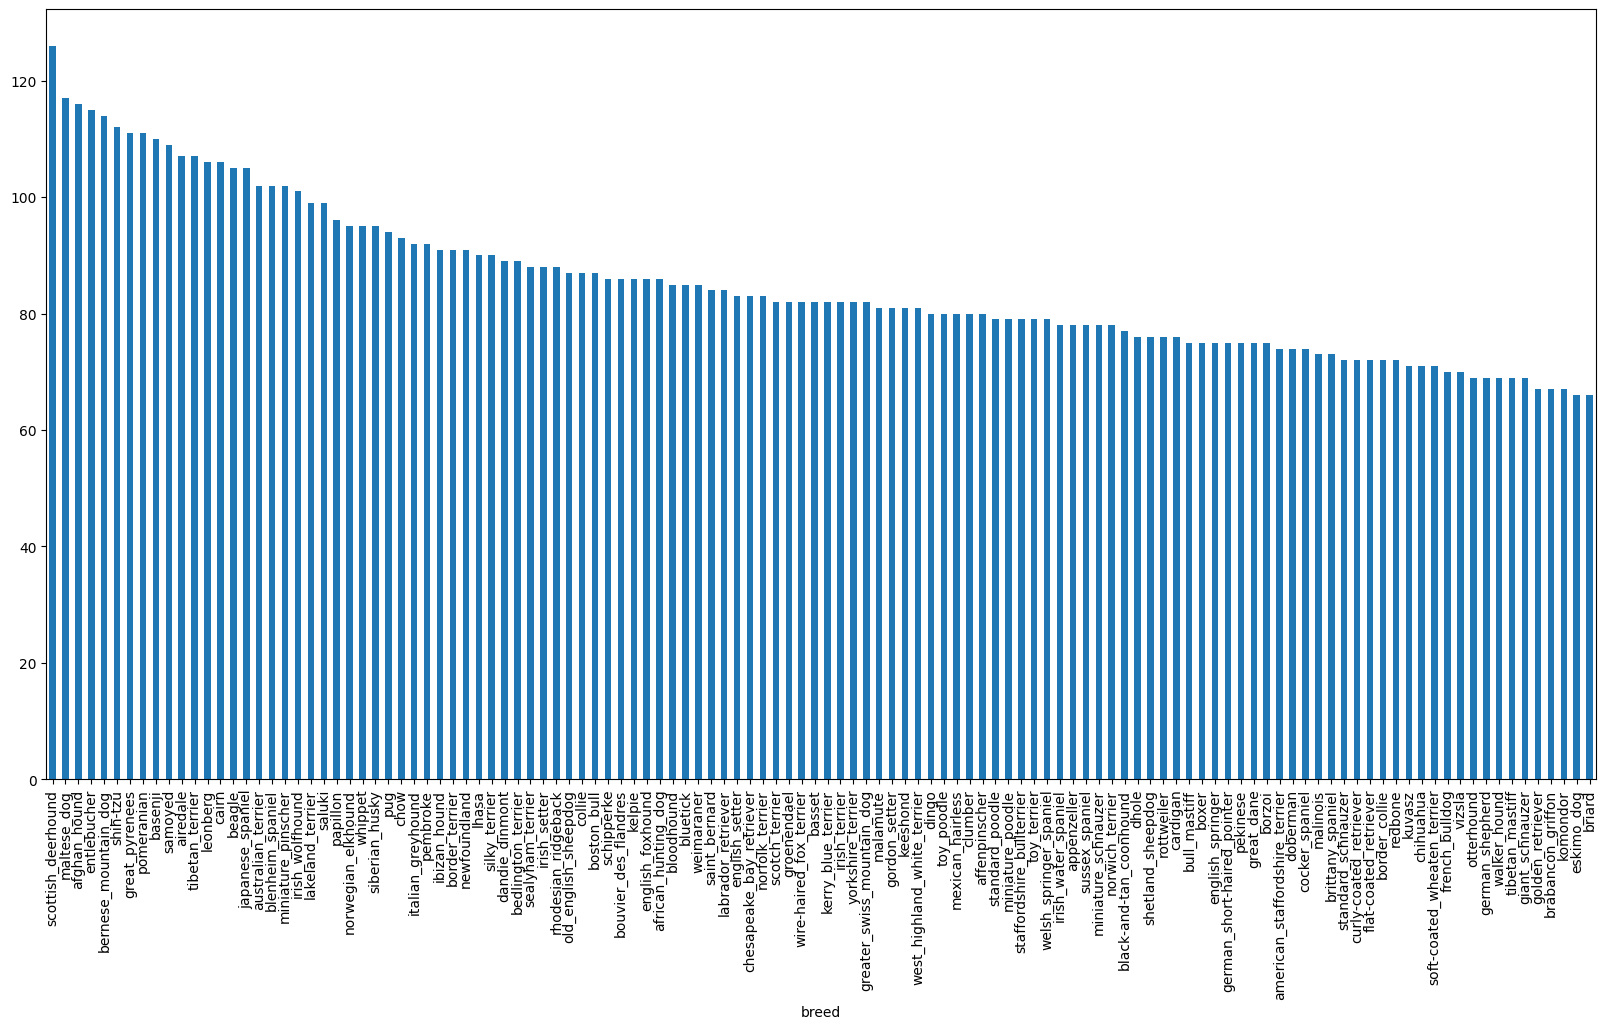

In [ ]:
# How many images are there for each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

In [ ]:
from IPython.display import Image
# Image("drive/MyDrive/ML/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting Images and their Labels


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/ML/dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv["id"]]

filenames

['drive/MyDrive/ML/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/ML/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/ML/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/ML/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/ML/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/ML/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/ML/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/ML/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/ML/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/ML/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/MyDrive/ML/dog-breed-identification/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/MyDrive/ML/do

In [ ]:
# Check whether number of files matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/ML/dog-breed-identification/train/")) == len(labels_csv):
  print("Filenames Match")
else:
  print("Filenames do not match")

Filenames Match


now that we've got our training image filepaths in a list, let's prepare our labels.

In [ ]:
labels = np.array(labels_csv["breed"])
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

## Creating our validation sets

In [ ]:
# Setup X & Y sets
X = filenames
y = boolean_labels

We're going to start off experimenting with ~1000 images and increase as needed.

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
# Let's split the data into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X[:NUM_IMAGES],
                                                       y[:NUM_IMAGES],
                                                       test_size=0.2,
                                                       random_state=42)

## Preprocessing Images (turning into Tensors)

To preprocess our images into Tensors, we're going to write a function that does few things:
* Take an Image filepath as input.
* Use TensorFlow to read the file and save it to a variable, `image`.
* Turn our `image` (a .jpg) into Tensors.
* Normalize our image (convert color channel values from 0-255 to 0-1 values)
* Resize the `image` to be a shape (224, 224)
* Return the modified `image`.

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def  process_image(image_path):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read an image file
  image = tf.io.read_file(image_path)

  # Turn the jpg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the colour values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired value (244, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches

In order to use Tensorflow efficiently, we need our data in the form of Tensor tuples which looks like this:
`(image, label)`.

In [ ]:
# Create a simple function to return a tuple
def get_image_label(image_path, label):
  '''
    Takes an image file path and the associated label, processes the image and returns the tuple (image, label).
  '''
  image = process_image(image_path)
  return image, label

Now let's turn all our data into batches

In [ ]:
# Define the batch size
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
    Creates batches of data out of X and y pairs.
    Shuffles the data if it is training data but doesn't shuffle if it is validation data.
    Also accepts test data as input (no labels)
  """
  # If the dataset is a test set, then we don't have any labels
  if test_data:
    print("Creating test batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # filepaths only (no label)
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  # filepath
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch

  else:
    print("Creating training batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  # filepath
                                               tf.constant(y))) # labels
    # Shuffling pathnames and labels beforemapping image processor
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_valid, y_valid, valid_data=True)

Creating training batches...
Creating validation batches...


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_batch_images(images, labels):
  """
  Displays a plot of images and their labels from a data batch.
  """
  plt.figure(figsize=(10, 10))
  # Loop through 25 images
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an Image
    plt.imshow(images[i])
    # add image label as the title of the image
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")
  plt.show()

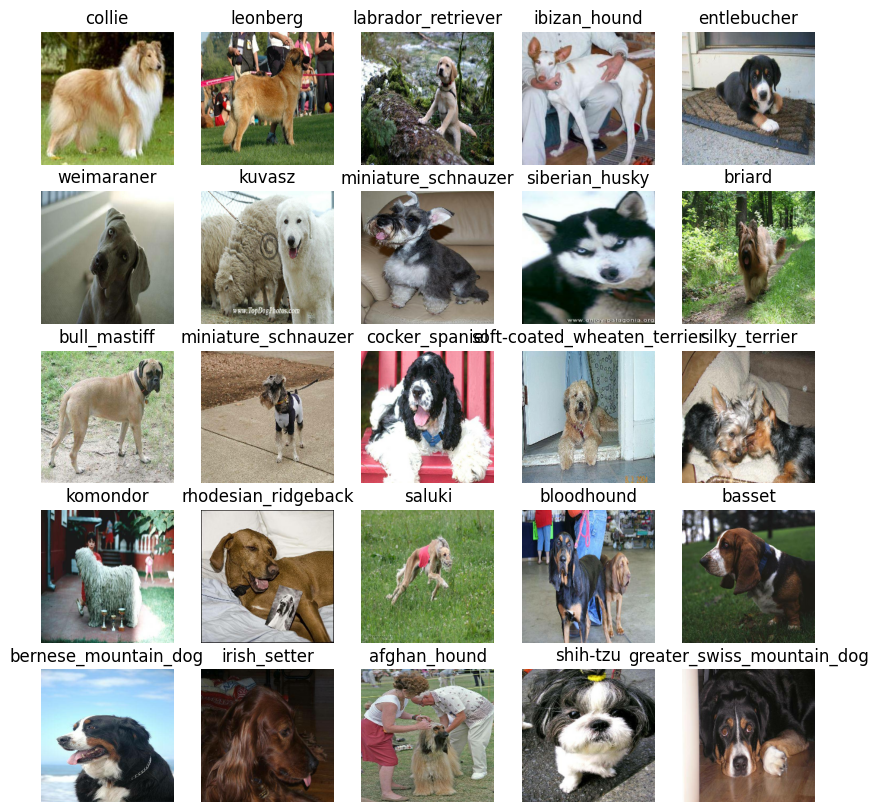

In [ ]:
# De-batchify data to visualize
train_images, train_labels = next(train_data.as_numpy_iterator())

# Visualize the data
show_batch_images(train_images, train_labels)

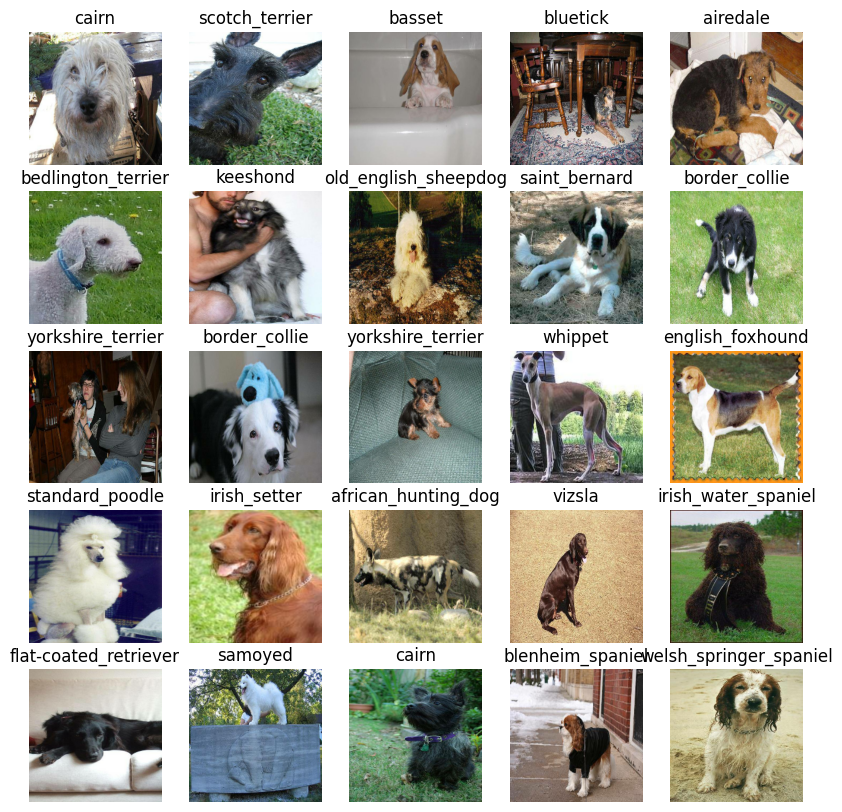

In [ ]:
# Let's do the same for validation batch
valid_images, valid_labels = next(val_data.as_numpy_iterator())
show_batch_images(valid_images, valid_labels)

## Building a model

Before we build a model, there are a few things we need to define:
* The input shape (the images shape, in the form of tensors) to our model.
* The output shape (labels shape, in the form of tensors) to our model.
* The URL of the model we want to use from TensorFlow Hub (now integrated with kaggle Models)

In [ ]:
# Define the input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Define the output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model from TensorFlow Hub
MODEL_URL = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"

Now let's create a function which will perform these tasks:
* Takes the input shape, the output shape and the model we would be using as the parameters.
* Defines the layers in a Keras model in a sequential method.
* Compiles the model (says how it should be evaluated and improved).
* Builds the model(tells the model the input shape it'll be getting).
* Returns the model.

In [ ]:

# Create a function that returns a keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with: ", model_url)

  # Create the hub.KerasLayer outside the Sequential constructor
  hub_layer = hub.KerasLayer(model_url)

  # Setup the model layers
  model = tf.keras.Sequential([hub_layer, # Layer 1 (input layer)
                               tf.keras.layers.Dense(units=output_shape,
                                                     activation="softmax") # Layer 2 (output layer)
                               ])
  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['Accuracy']
  )

  # Build the model
  model.build(input_shape)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with:  https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions a model can use during training to such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

### TensorBoard Callback  

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/ML/dog-breed-identification/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)

Our first model is only going to train 1000 images, to make sure everything is working.

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

Let's create a function which trains a model.

* Create a model using `create_model()`
* Setup a Tensorboard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use.
* Return the model.

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and return the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

Building model with:  https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1
Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 4.5718 - Accuracy: 0.1138 

25/25 [==============================] - 527s 21s/step - loss: 4.5718 - Accuracy: 0.1138 - val_loss: 3.4039 - val_Accuracy: 0.2650
Epoch 2/100
25/25 [==============================] - ETA: 0s - loss: 1.6251 - Accuracy: 0.7000

25/25 [==============================] - 49s 2s/step - loss: 1.6251 - Accuracy: 0.7000 - val_loss: 2.1425 - val_Accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 0.5577 - Accuracy: 0.9475

25/25 [==============================] - 46s 2s/step - loss: 0.5577 - Accuracy: 0.9475 - val_loss: 1.6664 - val_Accuracy: 0.6000
Epoch 4/100
25/25 [==============================] - ETA: 0s - loss: 0.2508 - Accuracy: 0.9875

25/25 [==============================] - 46s 2s/step - loss: 0.2508 - Accuracy: 0.9875 - val_loss: 1.4949 - val_Accuracy: 0.6250
Epoch 5/100
25/25 [==============================] - ETA: 0s - loss: 0.1452 - Accuracy: 0.9975

25/25 [==============================] - 47s 2s/step - loss: 0.1452 - Accuracy: 0.9975 - val_loss: 1.3988 - val_Accuracy: 0.6400
Epoch 6/100
25/25 [==============================] - ETA: 0s - loss: 0.0992 - Accuracy: 0.9987

25/25 [==============================] - 49s 2s/step - loss: 0.0992 - Accuracy: 0.9987 - val_loss: 1.3569 - val_Accuracy: 0.6450
Epoch 7/100
25/25 [==============================] - ETA: 0s - loss: 0.0751 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0751 - Accuracy: 1.0000 - val_loss: 1.3296 - val_Accuracy: 0.6700
Epoch 8/100
25/25 [==============================] - ETA: 0s - loss: 0.0595 - Accuracy: 1.0000

25/25 [==============================] - 48s 2s/step - loss: 0.0595 - Accuracy: 1.0000 - val_loss: 1.3075 - val_Accuracy: 0.6650
Epoch 9/100
25/25 [==============================] - ETA: 0s - loss: 0.0491 - Accuracy: 1.0000

25/25 [==============================] - 45s 2s/step - loss: 0.0491 - Accuracy: 1.0000 - val_loss: 1.2936 - val_Accuracy: 0.6650
Epoch 10/100
25/25 [==============================] - ETA: 0s - loss: 0.0412 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0412 - Accuracy: 1.0000 - val_loss: 1.2783 - val_Accuracy: 0.6600
Epoch 11/100
25/25 [==============================] - ETA: 0s - loss: 0.0354 - Accuracy: 1.0000

25/25 [==============================] - 45s 2s/step - loss: 0.0354 - Accuracy: 1.0000 - val_loss: 1.2665 - val_Accuracy: 0.6600
Epoch 12/100
25/25 [==============================] - ETA: 0s - loss: 0.0309 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0309 - Accuracy: 1.0000 - val_loss: 1.2573 - val_Accuracy: 0.6600
Epoch 13/100
25/25 [==============================] - ETA: 0s - loss: 0.0273 - Accuracy: 1.0000

25/25 [==============================] - 45s 2s/step - loss: 0.0273 - Accuracy: 1.0000 - val_loss: 1.2460 - val_Accuracy: 0.6700
Epoch 14/100
25/25 [==============================] - ETA: 0s - loss: 0.0243 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0243 - Accuracy: 1.0000 - val_loss: 1.2413 - val_Accuracy: 0.6700
Epoch 15/100
25/25 [==============================] - ETA: 0s - loss: 0.0219 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0219 - Accuracy: 1.0000 - val_loss: 1.2336 - val_Accuracy: 0.6700
Epoch 16/100
25/25 [==============================] - ETA: 0s - loss: 0.0198 - Accuracy: 1.0000

25/25 [==============================] - 48s 2s/step - loss: 0.0198 - Accuracy: 1.0000 - val_loss: 1.2290 - val_Accuracy: 0.6750
Epoch 17/100
25/25 [==============================] - ETA: 0s - loss: 0.0180 - Accuracy: 1.0000

25/25 [==============================] - 50s 2s/step - loss: 0.0180 - Accuracy: 1.0000 - val_loss: 1.2243 - val_Accuracy: 0.6800
Epoch 18/100
25/25 [==============================] - ETA: 0s - loss: 0.0165 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0165 - Accuracy: 1.0000 - val_loss: 1.2209 - val_Accuracy: 0.6750
Epoch 19/100
25/25 [==============================] - ETA: 0s - loss: 0.0152 - Accuracy: 1.0000

25/25 [==============================] - 45s 2s/step - loss: 0.0152 - Accuracy: 1.0000 - val_loss: 1.2148 - val_Accuracy: 0.6800
Epoch 20/100
25/25 [==============================] - ETA: 0s - loss: 0.0140 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0140 - Accuracy: 1.0000 - val_loss: 1.2135 - val_Accuracy: 0.6800
Epoch 21/100
25/25 [==============================] - ETA: 0s - loss: 0.0130 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0130 - Accuracy: 1.0000 - val_loss: 1.2104 - val_Accuracy: 0.6800
Epoch 22/100
25/25 [==============================] - ETA: 0s - loss: 0.0121 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0121 - Accuracy: 1.0000 - val_loss: 1.2094 - val_Accuracy: 0.6800
Epoch 23/100
25/25 [==============================] - ETA: 0s - loss: 0.0113 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0113 - Accuracy: 1.0000 - val_loss: 1.2031 - val_Accuracy: 0.6800
Epoch 24/100
25/25 [==============================] - ETA: 0s - loss: 0.0106 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0106 - Accuracy: 1.0000 - val_loss: 1.2019 - val_Accuracy: 0.6850
Epoch 25/100
25/25 [==============================] - ETA: 0s - loss: 0.0099 - Accuracy: 1.0000

25/25 [==============================] - 48s 2s/step - loss: 0.0099 - Accuracy: 1.0000 - val_loss: 1.1999 - val_Accuracy: 0.6850
Epoch 26/100
25/25 [==============================] - ETA: 0s - loss: 0.0093 - Accuracy: 1.0000

25/25 [==============================] - 47s 2s/step - loss: 0.0093 - Accuracy: 1.0000 - val_loss: 1.1978 - val_Accuracy: 0.6850
Epoch 27/100
25/25 [==============================] - ETA: 0s - loss: 0.0088 - Accuracy: 1.0000

25/25 [==============================] - 45s 2s/step - loss: 0.0088 - Accuracy: 1.0000 - val_loss: 1.1960 - val_Accuracy: 0.6850
Epoch 28/100
25/25 [==============================] - ETA: 0s - loss: 0.0083 - Accuracy: 1.0000

25/25 [==============================] - 45s 2s/step - loss: 0.0083 - Accuracy: 1.0000 - val_loss: 1.1969 - val_Accuracy: 0.6850
Epoch 29/100
25/25 [==============================] - ETA: 0s - loss: 0.0079 - Accuracy: 1.0000

25/25 [==============================] - 44s 2s/step - loss: 0.0079 - Accuracy: 1.0000 - val_loss: 1.1909 - val_Accuracy: 0.6900
Epoch 30/100
25/25 [==============================] - ETA: 0s - loss: 0.0075 - Accuracy: 1.0000

25/25 [==============================] - 45s 2s/step - loss: 0.0075 - Accuracy: 1.0000 - val_loss: 1.1912 - val_Accuracy: 0.6850
Epoch 31/100
25/25 [==============================] - ETA: 0s - loss: 0.0071 - Accuracy: 1.0000

25/25 [==============================] - 45s 2s/step - loss: 0.0071 - Accuracy: 1.0000 - val_loss: 1.1906 - val_Accuracy: 0.6850
Epoch 32/100
25/25 [==============================] - ETA: 0s - loss: 0.0067 - Accuracy: 1.0000

25/25 [==============================] - 44s 2s/step - loss: 0.0067 - Accuracy: 1.0000 - val_loss: 1.1899 - val_Accuracy: 0.6850
Epoch 33/100
25/25 [==============================] - ETA: 0s - loss: 0.0064 - Accuracy: 1.0000

25/25 [==============================] - 47s 2s/step - loss: 0.0064 - Accuracy: 1.0000 - val_loss: 1.1893 - val_Accuracy: 0.6850
Epoch 34/100
25/25 [==============================] - ETA: 0s - loss: 0.0061 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0061 - Accuracy: 1.0000 - val_loss: 1.1880 - val_Accuracy: 0.6850
Epoch 35/100
25/25 [==============================] - ETA: 0s - loss: 0.0058 - Accuracy: 1.0000

25/25 [==============================] - 49s 2s/step - loss: 0.0058 - Accuracy: 1.0000 - val_loss: 1.1862 - val_Accuracy: 0.6850
Epoch 36/100
25/25 [==============================] - ETA: 0s - loss: 0.0056 - Accuracy: 1.0000

25/25 [==============================] - 47s 2s/step - loss: 0.0056 - Accuracy: 1.0000 - val_loss: 1.1855 - val_Accuracy: 0.6850
Epoch 37/100
25/25 [==============================] - ETA: 0s - loss: 0.0053 - Accuracy: 1.0000

25/25 [==============================] - 44s 2s/step - loss: 0.0053 - Accuracy: 1.0000 - val_loss: 1.1854 - val_Accuracy: 0.6850
Epoch 38/100
25/25 [==============================] - ETA: 0s - loss: 0.0051 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0051 - Accuracy: 1.0000 - val_loss: 1.1850 - val_Accuracy: 0.6850
Epoch 39/100
25/25 [==============================] - ETA: 0s - loss: 0.0049 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0049 - Accuracy: 1.0000 - val_loss: 1.1844 - val_Accuracy: 0.6850
Epoch 40/100
25/25 [==============================] - ETA: 0s - loss: 0.0047 - Accuracy: 1.0000

25/25 [==============================] - 45s 2s/step - loss: 0.0047 - Accuracy: 1.0000 - val_loss: 1.1837 - val_Accuracy: 0.6900
Epoch 41/100
25/25 [==============================] - ETA: 0s - loss: 0.0045 - Accuracy: 1.0000

25/25 [==============================] - 47s 2s/step - loss: 0.0045 - Accuracy: 1.0000 - val_loss: 1.1838 - val_Accuracy: 0.6900
Epoch 42/100
25/25 [==============================] - ETA: 0s - loss: 0.0044 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0044 - Accuracy: 1.0000 - val_loss: 1.1824 - val_Accuracy: 0.6950
Epoch 43/100
25/25 [==============================] - ETA: 0s - loss: 0.0042 - Accuracy: 1.0000

25/25 [==============================] - 45s 2s/step - loss: 0.0042 - Accuracy: 1.0000 - val_loss: 1.1822 - val_Accuracy: 0.7000
Epoch 44/100
25/25 [==============================] - ETA: 0s - loss: 0.0040 - Accuracy: 1.0000

25/25 [==============================] - 47s 2s/step - loss: 0.0040 - Accuracy: 1.0000 - val_loss: 1.1821 - val_Accuracy: 0.6950
Epoch 45/100
25/25 [==============================] - ETA: 0s - loss: 0.0039 - Accuracy: 1.0000

25/25 [==============================] - 44s 2s/step - loss: 0.0039 - Accuracy: 1.0000 - val_loss: 1.1815 - val_Accuracy: 0.7000
Epoch 46/100
25/25 [==============================] - ETA: 0s - loss: 0.0038 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0038 - Accuracy: 1.0000 - val_loss: 1.1814 - val_Accuracy: 0.6950
Epoch 47/100
25/25 [==============================] - ETA: 0s - loss: 0.0036 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0036 - Accuracy: 1.0000 - val_loss: 1.1817 - val_Accuracy: 0.6950
Epoch 48/100
25/25 [==============================] - ETA: 0s - loss: 0.0035 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0035 - Accuracy: 1.0000 - val_loss: 1.1813 - val_Accuracy: 0.7000
Epoch 49/100
25/25 [==============================] - ETA: 0s - loss: 0.0034 - Accuracy: 1.0000

25/25 [==============================] - 46s 2s/step - loss: 0.0034 - Accuracy: 1.0000 - val_loss: 1.1809 - val_Accuracy: 0.6950
Epoch 50/100
25/25 [==============================] - ETA: 0s - loss: 0.0033 - Accuracy: 1.0000

25/25 [==============================] - 45s 2s/step - loss: 0.0033 - Accuracy: 1.0000 - val_loss: 1.1801 - val_Accuracy: 0.6950
Epoch 51/100
25/25 [==============================] - ETA: 0s - loss: 0.0032 - Accuracy: 1.0000

25/25 [==============================] - 45s 2s/step - loss: 0.0032 - Accuracy: 1.0000 - val_loss: 1.1806 - val_Accuracy: 0.6950
Epoch 52/100
22/25 [=========================>....] - ETA: 4s - loss: 0.0031 - Accuracy: 1.0000